In [1211]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [1212]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1213]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Cleaning

In [1214]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1215]:
train_data.duplicated().sum()

0

In [1216]:
print(train_data['Embarked'].unique())

['S' 'C' 'Q' nan]


In [1217]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [1218]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [1219]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [1220]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [1221]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1222]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1223]:
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [1224]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Tipe Data

In [1225]:
numerical_feature = [feature for feature in train_data.columns if train_data[feature].dtypes not in ['0', 'o', 'object']]
categorical_feature = [feature for feature in train_data.columns if train_data[feature].dtypes in ['0', 'o', 'object']]

In [1226]:
numerical_feature

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [1227]:
categorical_feature

['Sex', 'Embarked']

## Explatory Data Analysis

In [1228]:
train_data.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

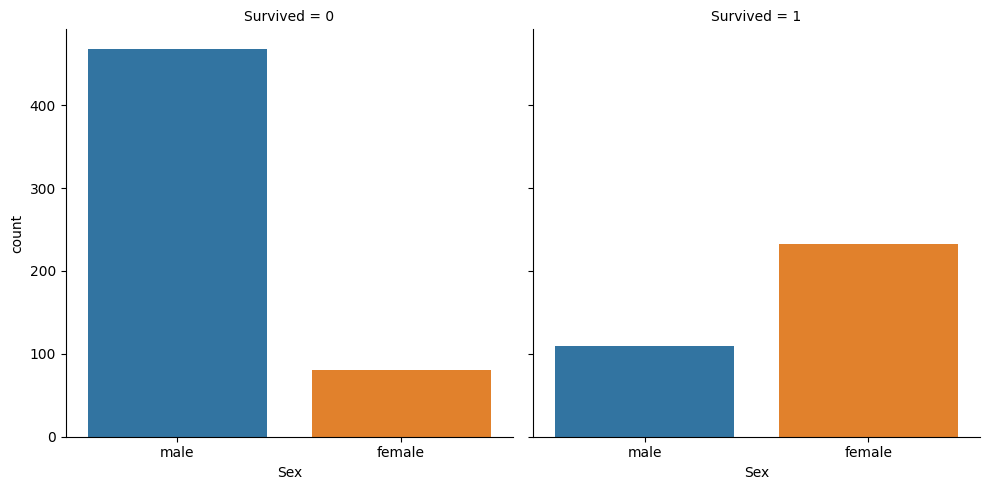

In [1229]:
sns.catplot(x='Sex',col='Survived',kind='count',data=train_data);

In [1230]:
print("persentase perempuan yang selamat : " , train_data[train_data.Sex == 'female'].Survived.sum()/train_data[train_data.Sex == 'female'].Survived.count())
print("persentase laki-laki yang selamat : " , train_data[train_data.Sex == 'male'].Survived.sum()/train_data[train_data.Sex == 'male'].Survived.count())

persentase perempuan yang selamat :  0.7420382165605095
persentase laki-laki yang selamat :  0.18890814558058924


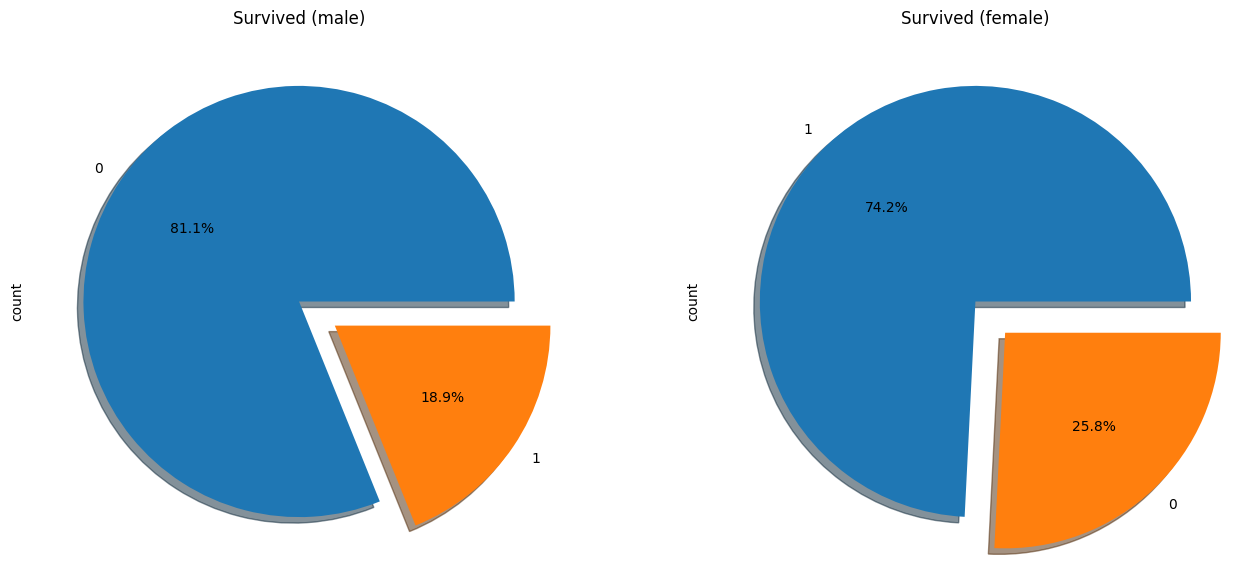

In [1231]:
f,ax=plt.subplots(1,2,figsize=(16,7))
train_data['Survived'][train_data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
train_data['Survived'][train_data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

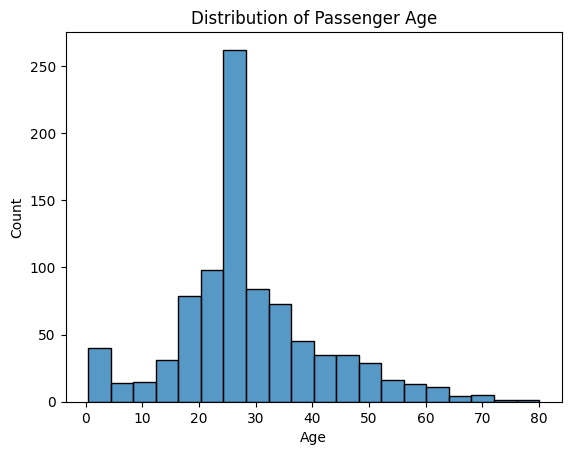

In [1232]:
sns.histplot(train_data['Age'], bins=20)
plt.title('Distribution of Passenger Age')
plt.show()

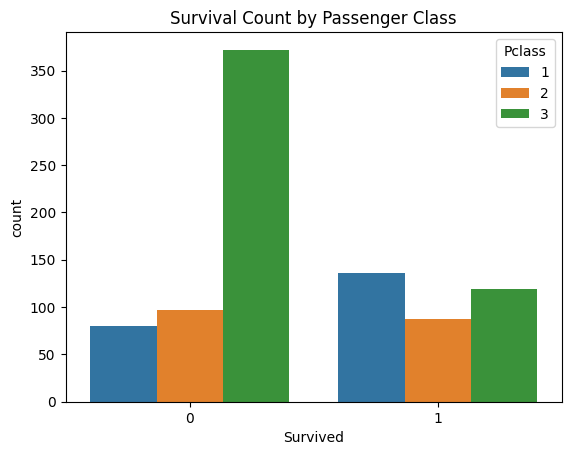

In [1233]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.show()

## Machine Learning

### Data Preprocessing

In [1234]:
print(numerical_feature)
print(categorical_feature)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']


In [1235]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [1236]:
# Convert 'Sex' column to dummy variables
train_data['Sex'] = pd.get_dummies(train_data['Sex'], drop_first=True)

# Convert 'Embarked' column to dummy variables
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

test_data['Sex'] = pd.get_dummies(test_data['Sex'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)


In [1237]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [1238]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1239]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### SVC

In [1240]:
# Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='rbf', random_state=42)
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

# Model Evaluation - Random Forest
print("\nRandom Forest:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))


Random Forest:
Accuracy Score: 0.8212290502793296

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
[[95 10]
 [22 52]]


### Decision Tree

In [1241]:
# Decision Tree
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Predictions
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Model Evaluation - Decision Tree
print("\nDecision Tree:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_decision_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_decision_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))


Decision Tree:
Accuracy Score: 0.7877094972067039

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
[[86 19]
 [19 55]]


### Logistic Regression

In [1242]:
# Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_classifier.predict(X_test)

# Model Evaluation - Logistic Regression
print("Logistic Regression:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression:
Accuracy Score: 0.8100558659217877

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[90 15]
 [19 55]]


In [1243]:
# Model Evaluation
models = {
    'Logistic Regression': y_pred_logistic,
    'Decision Tree': y_pred_decision_tree,
    'SVC': y_pred_svc
}

# Print accuracy scores as percentages
print("Accuracy Scores:")
for model, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_percentage = accuracy * 100
    print(f"{model}: {accuracy_percentage:.2f}%")

Accuracy Scores:
Logistic Regression: 81.01%
Decision Tree: 78.77%
SVC: 82.12%


## Submission

In [1244]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    bool   
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 17.7 KB


In [1245]:
final_svc = SVC(kernel='poly', degree=3)
final_svc.fit(X , y)

final_pred = final_svc.predict(test_data)

In [1246]:
test_sub = pd.read_csv('../input/titanic/test.csv')

submission = pd.DataFrame({
        "PassengerId": test_sub["PassengerId"],
        "Survived": final_pred
        })